In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
import plotly.express as px
from plotly.subplots import make_subplots
import scikitplot as skplt
warnings.filterwarnings("ignore")
#pd.set_option('display.float_format', lambda x: '%0.9f' % x)
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [ ]:
path_to_protocol5='./dataset_/dataset_cleaned_popularity.pkl'

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
with open(path_to_protocol5, "rb") as fh:
  df = pickle.load(fh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.drop(columns=['index', 'level_0'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(5)

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,...,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166681 entries, 0 to 166680
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              166681 non-null  object 
 1   uri                  166681 non-null  object 
 2   popularity           166681 non-null  float64
 3   title                166681 non-null  object 
 4   artist               166681 non-null  object 
 5   release_type         166681 non-null  object 
 6   sub_genre            166681 non-null  object 
 7   artist_followers     166681 non-null  float64
 8   explicit             166681 non-null  object 
 9   album                166681 non-null  object 
 10  release_date         166681 non-null  object 
 11  track_number         166681 non-null  object 
 12  tracks_in_album      166681 non-null  object 
 13  danceability         166681 non-null  float64
 14  energy               166681 non-null  float64
 15  key              

In [ ]:
df = df.groupby(['title', 'artist', 'release_type', 'sub_genre', 'artist_followers', 'explicit', 'album', 'track_number', 'tracks_in_album', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'genre', 'duration_min'])['popularity'].sum().reset_index(name='popularity')
df.sort_values(by='popularity', ascending=False).head(5)

,title,artist,release_type,sub_genre,artist_followers,explicit,album,track_number,tracks_in_album,danceability,...,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min,popularity
44347,shape of you,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),4,16,0.825,...,0.0802,0.581,0.000000,0.0931,0.931,95.977,4,pop,3.895217,5732932.35
11084,dance monkey,Tones And I,single,australian pop,2283019.0,False,Dance Monkey,1,1,0.825,...,0.0988,0.688,0.000161,0.1700,0.540,98.078,4,pop,3.495917,3624590.65
38649,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),5,16,0.599,...,0.0232,0.163,0.000000,0.1060,0.168,95.050,3,pop,4.390000,2933691.50
4479,bad guy,Billie Eilish,album,electropop,34697267.0,False,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,14,0.701,...,0.3750,0.328,0.130000,0.1000,0.562,135.128,4,pop,3.234800,2812179.25
44321,shallow,Lady Gaga - Bradley Cooper,album,dance pop,14439685.0,False,A Star Is Born Soundtrack,12,34,0.572,...,0.0308,0.371,0.000000,0.2310,0.323,95.799,4,pop,3.595550,2600171.85


In [ ]:
df_pred = df.copy()

In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59467 entries, 0 to 59466
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             59467 non-null  object 
 1   artist            59467 non-null  object 
 2   release_type      59467 non-null  object 
 3   sub_genre         59467 non-null  object 
 4   artist_followers  59467 non-null  float64
 5   explicit          59467 non-null  object 
 6   album             59467 non-null  object 
 7   track_number      59467 non-null  object 
 8   tracks_in_album   59467 non-null  object 
 9   danceability      59467 non-null  float64
 10  energy            59467 non-null  float64
 11  key               59467 non-null  object 
 12  loudness          59467 non-null  float64
 13  mode              59467 non-null  object 
 14  speechiness       59467 non-null  float64
 15  acoustics         59467 non-null  float64
 16  instrumentalness  59467 non-null  float6

## Logarithmic Transformation

In [ ]:
print('popularity:',df['popularity'].skew())
print('artist_followers:',df['artist_followers'].skew())
print('danceability:',df['danceability'].skew())
print('energy:',df['energy'].skew())
print('loudness:',df['loudness'].skew())
print('speechiness:',df['speechiness'].skew())
print('acoustics:',df['acoustics'].skew())
print('instrumentalness:',df['instrumentalness'].skew())
print('liveness:',df['liveness'].skew())
print('valence:',df['valence'].skew())
print('tempo:',df['tempo'].skew())

popularity: 17.785842557052366
artist_followers: 5.313004621992586
danceability: -0.5401994661138162
energy: -0.586986845344528
loudness: -1.587035638887538
speechiness: 1.6971729734537973
acoustics: 1.0018071553550227
instrumentalness: 7.920436134144119
liveness: 2.524366559628569
valence: 0.08670467553566456
tempo: 0.4239893740392569


In [ ]:
column_right_skewed = ['duration_min', 'liveness', 'artist_followers', 'popularity']
for col in column_right_skewed:
    df_pred[col] = np.log(df_pred[col])

In [ ]:
column_right_skewed = ['speechiness','acoustics','instrumentalness']
for col in column_right_skewed:
    df_pred[col] = np.log1p(df_pred[col])

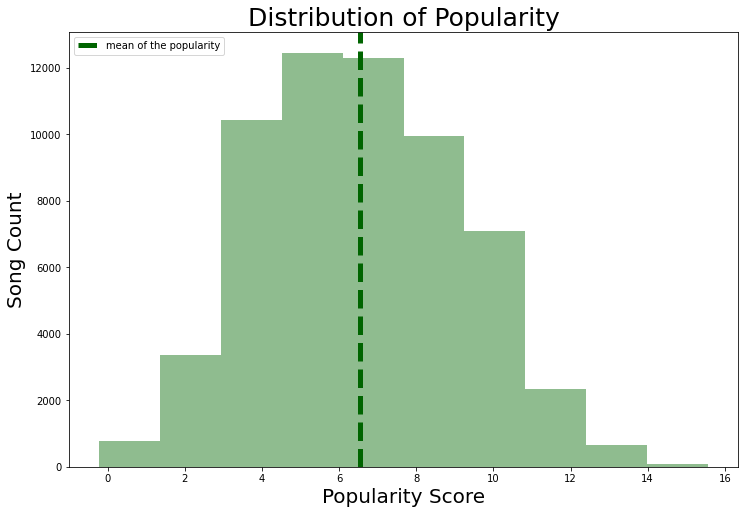

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
df_pred['popularity'].hist(ax=ax, color='darkseagreen')
ax.grid(False)
ax.set_title('Distribution of Popularity', fontsize=25)
ax.set_xlabel('Popularity Score', fontsize=20)
ax.set_ylabel('Song Count', fontsize=20)
plt.axvline(df_pred['popularity'].mean(), color='darkgreen', linestyle ="--", linewidth=5, label= 'mean of the popularity')
plt.legend(loc = 'upper left')

In [ ]:
df_pred['popularity_class'] = 'na'
df_pred.loc[(df_pred.popularity > df_pred.popularity.mean()), 'popularity_class'] = 'Popular'
df_pred.loc[(df_pred.popularity <= df_pred.popularity.mean()), 'popularity_class'] = 'Not Popular'

In [ ]:
df_pred[df_pred['popularity_class'] == 'Not Popular']

,title,artist,release_type,sub_genre,artist_followers,explicit,album,track_number,tracks_in_album,danceability,...,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_min,popularity,popularity_class
2,!ill be back!,Rilès,single,french hip hop,13.328738,True,!I'll Be Back!,1,1,0.823,...,0.155293,0.000000,-2.216407,0.688,142.959,4,hip hop,1.090429,3.903991,Not Popular
3,#%_! dig selv,Artigeardit,album,danish hip hop,9.895506,True,IDIOT,9,16,0.655,...,0.117783,0.000014,-1.795767,0.241,94.146,4,hip hop,1.142836,6.023569,Not Popular
4,#213,YL,album,francoton,13.332877,True,Vaillants,4,12,0.714,...,0.182322,0.000000,-2.431555,0.497,190.567,3,indie,1.201515,3.887730,Not Popular
5,#24,Dolu Kadehi Ters Tut,album,turkish alt pop,13.455735,False,Karanlık,3,9,0.566,...,0.447886,0.000060,-2.032558,0.364,171.999,4,pop,1.336758,6.287115,Not Popular
7,#25,Dolu Kadehi Ters Tut,single,turkish alt pop,13.455735,False,#25,1,1,0.748,...,0.125751,0.000051,-1.358679,0.641,139.976,4,pop,1.172038,6.012859,Not Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59460,에너제틱 energetic,Wanna One,album,k-pop,14.273389,False,1-1=0(NOTHING WITHOUT YOU),8,10,0.714,...,0.056380,0.000000,-2.189256,0.752,125.046,4,k-pop,1.149284,4.330733,Not Popular
59461,우린 친구뿐일까,Sondia,single,k-pop,9.837348,False,ITAEWON CLASS (Original Television Soundtrack)...,1,4,0.408,...,0.614645,0.000000,-1.951928,0.148,131.945,4,k-pop,1.336461,2.772589,Not Popular
59463,파란 봄,AILEE,single,k-pop,13.494586,False,"Dunia - Into A New World, Pt. 1 (Original Soun...",1,2,0.540,...,0.377751,0.000000,-1.870803,0.216,131.990,3,k-pop,1.433826,3.996364,Not Popular
59464,피 땀 눈물,BTS,album,k-pop,17.024570,False,WINGS,2,15,0.583,...,0.024107,0.000000,-1.030019,0.601,92.959,4,k-pop,1.285792,5.660179,Not Popular


**Min-Max Scaling**

In [ ]:
numerical_cols=df_pred.select_dtypes(include=['float64','int64']).columns.tolist()
encoded_cols=['mode']
categorical_cols=df_pred.select_dtypes(include=['object']).columns.tolist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(df_pred[numerical_cols])
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=df_pred[numerical_cols].columns)
scaled_numeric_df.describe()

,artist_followers,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveness,valence,tempo,duration_min,popularity
count,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000,59467.000000
mean,0.658719,0.676490,0.641117,0.814175,0.176662,0.317960,0.016885,0.562000,0.508448,0.527070,0.395087,0.428980
std,0.146684,0.149859,0.175699,0.058294,0.151839,0.271802,0.097377,0.138384,0.225961,0.123784,0.049723,0.165017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.557927,0.579858,0.534781,0.787394,0.060797,0.083957,0.000000,0.471651,0.332659,0.427444,0.368245,0.301692
50%,0.667521,0.693795,0.660109,0.823046,0.108156,0.244550,0.000000,0.526321,0.503539,0.521227,0.395396,0.420461
75%,0.761612,0.787386,0.770398,0.851979,0.261986,0.505683,0.000055,0.646966,0.681496,0.607952,0.422656,0.549722
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


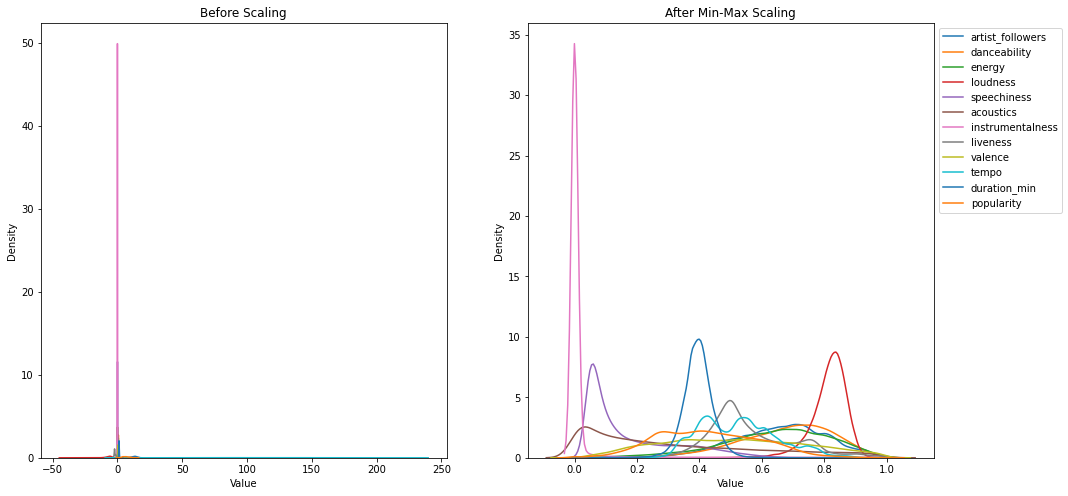

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_pred['artist_followers'], ax=ax1)
sns.kdeplot(df_pred['danceability'], ax=ax1)
sns.kdeplot(df_pred['energy'], ax=ax1)
sns.kdeplot(df_pred['loudness'], ax=ax1)
sns.kdeplot(df_pred['speechiness'], ax=ax1)
sns.kdeplot(df_pred['acoustics'], ax=ax1)
sns.kdeplot(df_pred['instrumentalness'], ax=ax1)
sns.kdeplot(df_pred['liveness'], ax=ax1)
sns.kdeplot(df_pred['valence'], ax=ax1)
sns.kdeplot(df_pred['tempo'], ax=ax1)
sns.kdeplot(df_pred['duration_min'], ax=ax1)
sns.kdeplot(df_pred['popularity'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_numeric_df['artist_followers'], ax=ax2)
sns.kdeplot(scaled_numeric_df['danceability'], ax=ax2)
sns.kdeplot(scaled_numeric_df['energy'], ax=ax2)
sns.kdeplot(scaled_numeric_df['loudness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['speechiness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['acoustics'], ax=ax2)
sns.kdeplot(scaled_numeric_df['instrumentalness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['liveness'], ax=ax2)
sns.kdeplot(scaled_numeric_df['valence'], ax=ax2)
sns.kdeplot(scaled_numeric_df['tempo'], ax=ax2)
sns.kdeplot(scaled_numeric_df['duration_min'], ax=ax2)
sns.kdeplot(scaled_numeric_df['popularity'], ax=ax2)
plt.legend(labels=["artist_followers","danceability", "energy", "loudness", "speechiness", "acoustics", "instrumentalness", "liveness", "valence", "tempo", "duration_min", "popularity"], loc = 2, bbox_to_anchor = (1,1))
ax1.set(xlabel="Value")
ax2.set(xlabel="Value")
plt.show()

**Split the dataset**

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(35679, 11)
(11894, 11)
(11894, 11)


In [ ]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
def get_test_report(model):
    
    y_pred = model.predict(X_test)
    
    return(classification_report(y_test, y_pred))

In [ ]:
def get_val_report(model):
    
    y_pred = model.predict(X_val)
    
    return(classification_report(y_val, y_pred))

In [ ]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)

    return(classification_report(y_train, train_pred))

In [ ]:
def con_matrix(model):
    
    y_pred = model.predict(X_test)
    
    con = confusion_matrix(y_test, y_pred)
    
    c = pd.DataFrame(con, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
    
    sns.heatmap(c, annot = True)

In [ ]:
def plot_feature_importance(importance, names, model_type, size):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names,
            'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize = size)
    #Plot Searborn bar chart
    sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature names')

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
test_report = get_test_report(lr_model)

print(test_report)

              precision    recall  f1-score   support

 Not Popular       0.60      0.63      0.61      6180
     Popular       0.57      0.54      0.56      5714

    accuracy                           0.59     11894
   macro avg       0.59      0.58      0.58     11894
weighted avg       0.59      0.59      0.59     11894



In [ ]:
y_pred_lr = lr_model.predict(X_test)

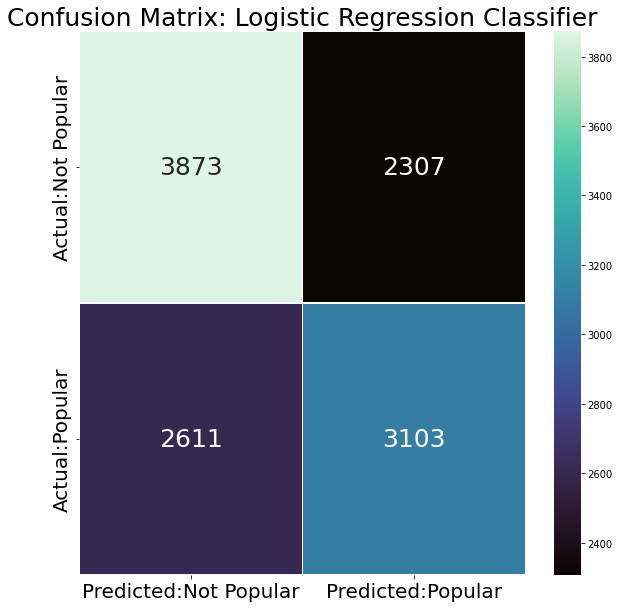

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_lr)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:Not Popular','Predicted:Popular'], index = ['Actual:Not Popular','Actual:Popular'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = True, 
            linewidths = 0.1, annot_kws = {'size':25}, cmap='mako')
plt.title('Confusion Matrix: Logistic Regression Classifier', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

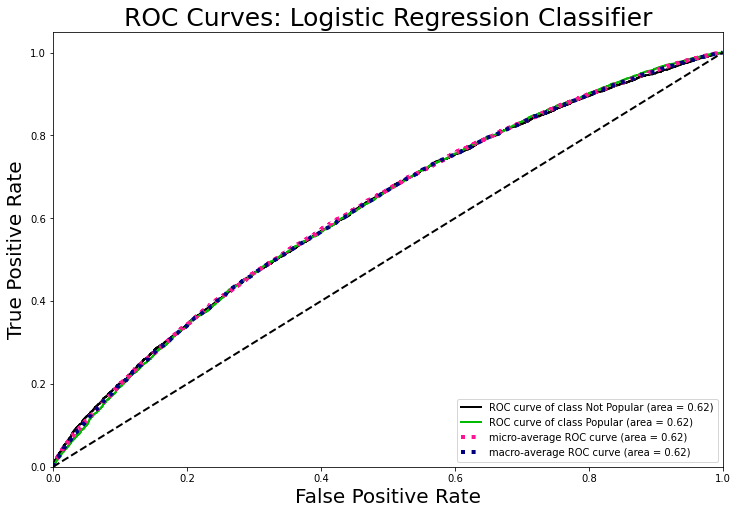

In [ ]:
y_probas = lr_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas, figsize=(
12, 8), title='ROC Curves: Logistic Regression Classifier')
plt.title('ROC Curves: Logistic Regression Classifier', fontsize = 25)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.show()

## Random Forest Classifier

In [ ]:
rf_classification = RandomForestClassifier()

rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
test_report = get_test_report(rf_model)

print(test_report)

              precision    recall  f1-score   support

 Not Popular       0.61      0.67      0.64      6180
     Popular       0.60      0.55      0.57      5714

    accuracy                           0.61     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.61      0.61      0.61     11894



In [ ]:
y_pred_rf = rf_model.predict(X_test)

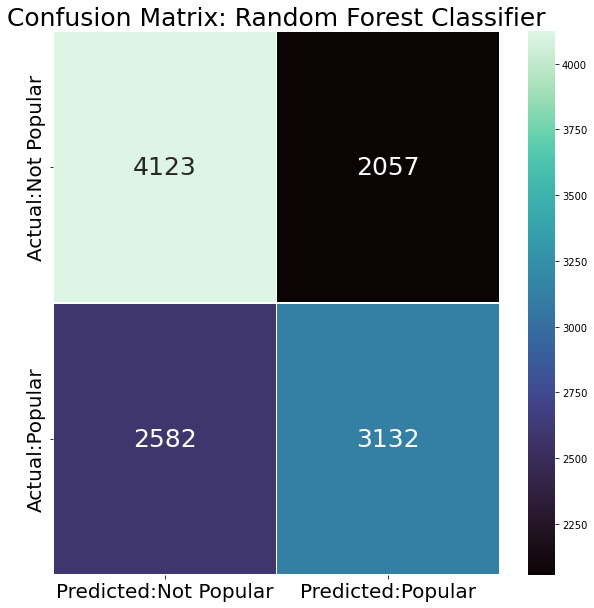

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:Not Popular','Predicted:Popular'], index = ['Actual:Not Popular','Actual:Popular'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = True, 
            linewidths = 0.1, annot_kws = {'size':25}, cmap='mako')
plt.title('Confusion Matrix: Random Forest Classifier', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

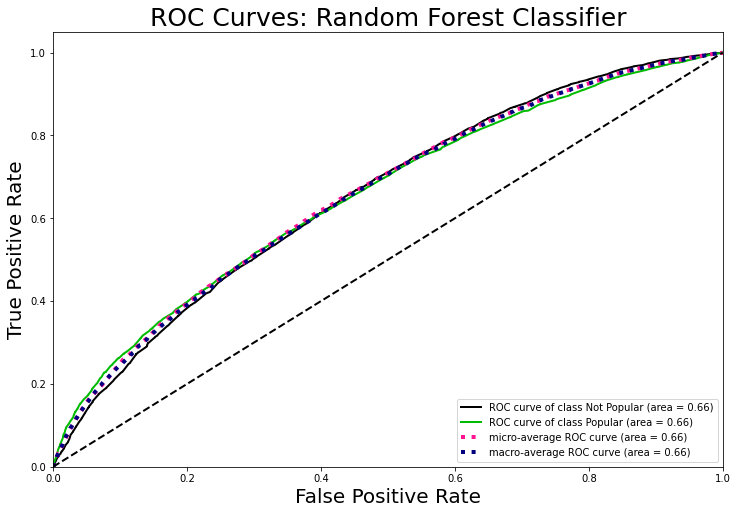

In [ ]:
y_probas = rf_model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas, figsize=(
12, 8), title='ROC Curves: Random Forest Classifier')
plt.title('ROC Curves: Random Forest Classifier', fontsize = 25)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.show()

In [ ]:
importance = rf_model.feature_importances_
importance.shape

(11,)

Text(0.5, 0, 'Feature Importance Score')

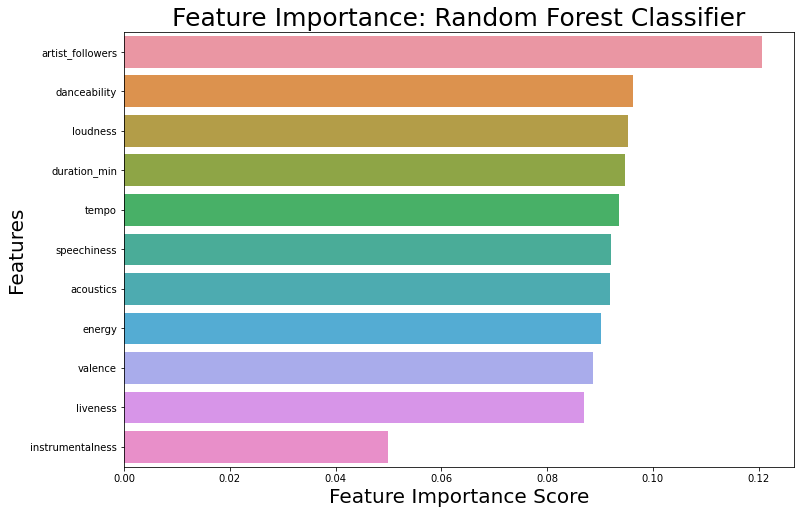

In [ ]:
importance = rf_model.feature_importances_
plot_feature_importance(importance, X.columns, 'Num. Features: Random Forest Classifier', size=(12,8))
plt.title('Feature Importance: Random Forest Classifier', fontsize = 25)
plt.ylabel('Features', fontsize = 20)
plt.xlabel('Feature Importance Score',fontsize = 20)

## Decision Tree Classifier

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

decision_tree = dt_model.fit(X_train, y_train)

In [ ]:
test_report = get_test_report(decision_tree)

print('Train data:\n', test_report)

Train data:
               precision    recall  f1-score   support

 Not Popular       0.57      0.57      0.57      6180
     Popular       0.54      0.54      0.54      5714

    accuracy                           0.56     11894
   macro avg       0.56      0.56      0.56     11894
weighted avg       0.56      0.56      0.56     11894



In [ ]:
y_pred_dt = decision_tree.predict(X_test)

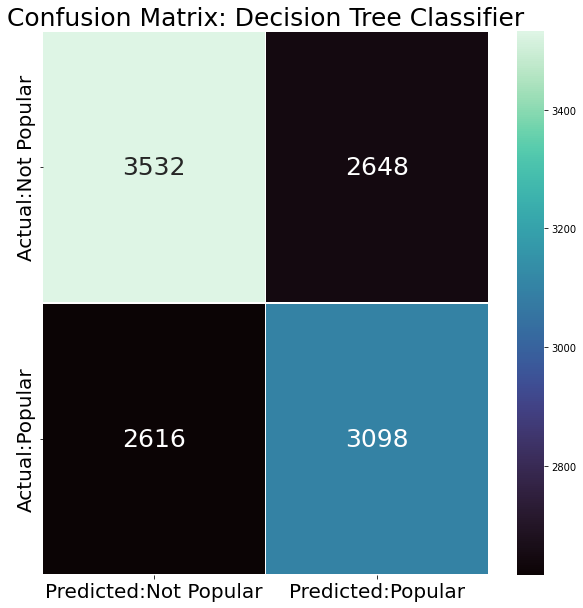

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_dt)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:Not Popular','Predicted:Popular'], index = ['Actual:Not Popular','Actual:Popular'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = True, 
            linewidths = 0.1, annot_kws = {'size':25}, cmap='mako')
plt.title('Confusion Matrix: Decision Tree Classifier', fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

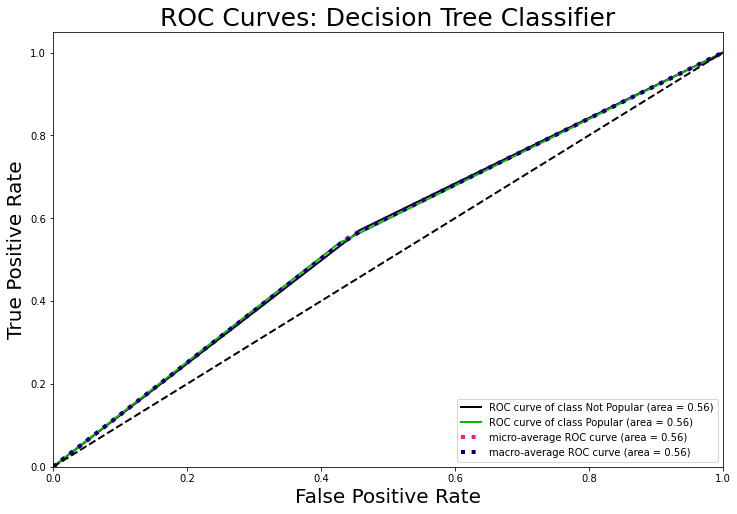

In [ ]:
y_probas = decision_tree.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas, figsize=(
12, 8), title='ROC Curves: Decision Tree Classifier')
plt.title('ROC Curves: Decision Tree Classifier', fontsize = 25)
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.show()

In [ ]:
importance = decision_tree.feature_importances_
importance.shape

(11,)

Text(0.5, 0, 'Feature Importance Score')

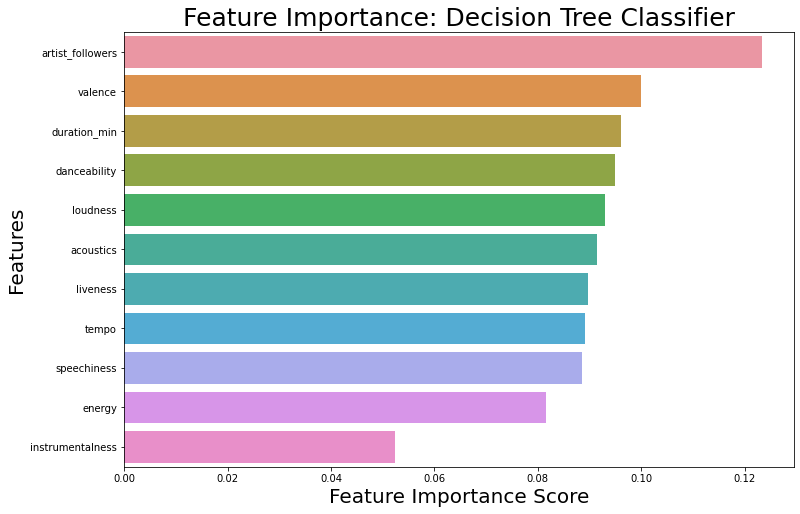

In [ ]:
importance = decision_tree.feature_importances_
plot_feature_importance(importance, X.columns, 'Num. Features: Decision Tree', size=(12,8))
plt.title('Feature Importance: Decision Tree Classifier', fontsize = 25)
plt.ylabel('Features', fontsize = 20)
plt.xlabel('Feature Importance Score',fontsize = 20)